In [1]:
#Importing the  necessary liberaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#reading the playstore data
play_store_data = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv')


In [13]:
#required functionalites
paid_apps = play_store_data[play_store_data['Type'] == 'Paid'].copy()
paid_apps['Installs'] = paid_apps['Installs'].str.replace('[+,]', '', regex=True).astype(float)
paid_apps['Price'] = paid_apps['Price'].str.replace('$', '', regex=False).astype(float)
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']


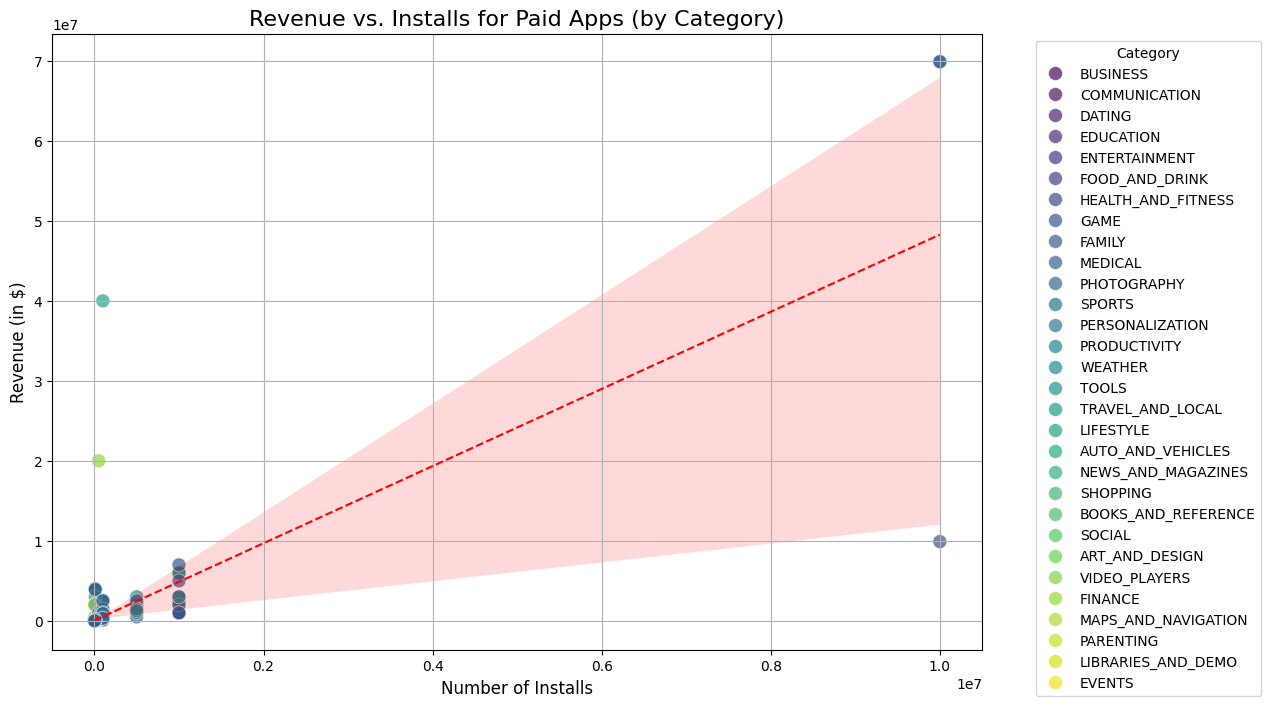

In [14]:
#scatter plot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='viridis',
    s=100,
    alpha=0.7,
    edgecolor="w",
    linewidth=0.5
)
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='red',
    line_kws={'linewidth': 1.5, 'linestyle': '--'}
)
plt.title('Revenue vs. Installs for Paid Apps (by Category)', fontsize=16)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('Revenue (in $)', fontsize=12)


plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

#display the final plot
plt.show()

In [30]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
#reading the playstore dataset 
data = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

#cleaning and preprocessing the data
data = data.dropna(subset=['Category', 'Installs'])
data = data[data['Installs'].str.contains('\\d', regex=True)]
data['Installs'] = data['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)#check if current time is between 12 PM and 6 PM
current_hour = datetime.now().hour
if current_hour >= 8 and current_hour < 12:
    print("Sorry, this visualization is not available between 12 PM and 6 PM.")
else:
    #conditions to plot the graph
    data = data[~data['Category'].str.startswith(('A', 'C', 'G', 'S'))]
    
    top_categories = data.groupby('Category')['Installs'].sum().nlargest(5).index
    data = data[data['Category'].isin(top_categories)]
    
    np.random.seed(42)  
    countries = ['USA', 'Brazil', 'India', 'Russia', 'China', 'Japan', 'Germany', 
                'United Kingdom', 'France', 'Canada', 'Australia', 'Mexico']
    data['Country'] = np.random.choice(countries, size=len(data))
    
    country_data = data.groupby(['Country', 'Category'])['Installs'].sum().reset_index()
    
    #creating the chlopetric graph
    fig = px.choropleth(country_data,
                        locations='Country',
                        locationmode='country names',
                        color='Installs',
                        hover_name='Country',
                        color_continuous_scale='Viridis',
                        title='App Installs by Country (Top 5 Categories)',
                        labels={'Installs': 'Number of Installs'})
    
    fig.update_layout(
        title_x=0.5,
        geo=dict(showframe=False,
                showcoastlines=True,
                projection_type='equirectangular'),
        width=1000,
        height=600
    )
    
    #saving in HTML format
    fig.write_html('app_installs_map.html')
    print("Map has been generated and saved as 'app_installs_map.html'")

Map has been generated and saved as 'app_installs_map.html'


In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#load the dataset
data = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

#cleaning and filtering the data
data = data.dropna(subset=['Category', 'Installs', 'Size', 'Price', 'Content Rating', 'Android Ver'])
data['Installs'] = data['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)


data['Size'] = data['Size'].replace('Varies with device', np)
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', 'e-3').astype(float)
data['Price'] = data['Price'].str.replace('$', '', regex=False).astype(float)

#apply filters
filtered_data = data[(data['Installs'] >= 10000) &
                     (data['Price'] * data['Installs'] >= 10000) &
                     (data['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float) > 4.0).any(axis=1) &
                     (data['Size'] > 15) &
                     (data['Content Rating'] == 'Everyone') &
                     (data['App'].str.len() <= 30)]


filtered_data['Revenue'] = filtered_data['Price'] * filtered_data['Installs']
top_categories = filtered_data.groupby('Category')['Installs'].sum().nlargest(3).index
filtered_data = filtered_data[filtered_data['Category'].isin(top_categories)]

summary = filtered_data.groupby(['Category', 'Type']).agg(
    Avg_Installs=('Installs', 'mean'),
    Avg_Revenue=('Revenue', 'mean')
).reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_19908\1381067507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Revenue'] = filtered_data['Price'] * filtered_data['Installs']


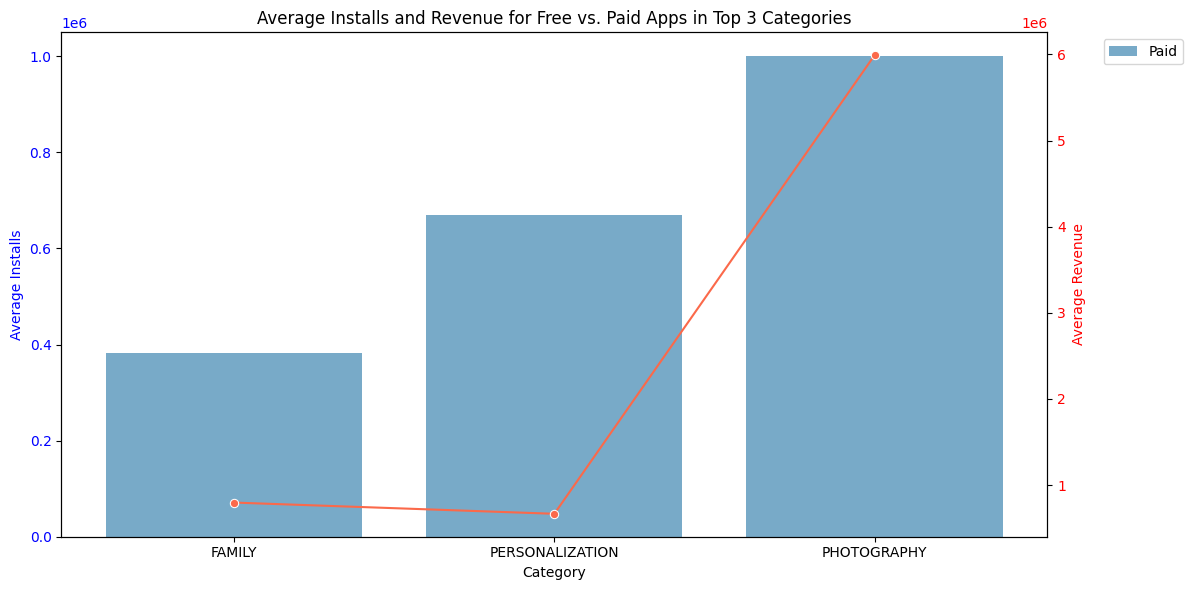

In [19]:
#plotting the dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=summary, x='Category', y='Avg_Installs', hue='Type', ax=ax1, palette='Blues')
ax1.set_ylabel('Average Installs', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Average Installs and Revenue for Free vs. Paid Apps in Top 3 Categories')

ax2 = ax1.twinx()
sns.lineplot(data=summary, x='Category', y='Avg_Revenue', hue='Type', ax=ax2, marker='o', palette='Reds')
ax2.set_ylabel('Average Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend_.remove()

plt.tight_layout()
plt.show()

In [4]:
#importing  required liberaries 
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
#reading the dataset
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

#cleaning the dataset
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
    return None

df['Size'] = df['Size'].replace('Varies with device', None).apply(convert_size)

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

filtered_df = df[
    (df['Rating'] >= 4.0) & 
    (df['Size'] >= 10) & 
    (df['Last Updated'].dt.month == 1)
].dropna()

grouped = filtered_df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'count',
    'Installs': 'sum'
}).reset_index()

top_categories = grouped.nlargest(10, 'Installs')

top_categories['Reviews_Normalized'] = (top_categories['Reviews'] / top_categories['Reviews'].max()) * 5

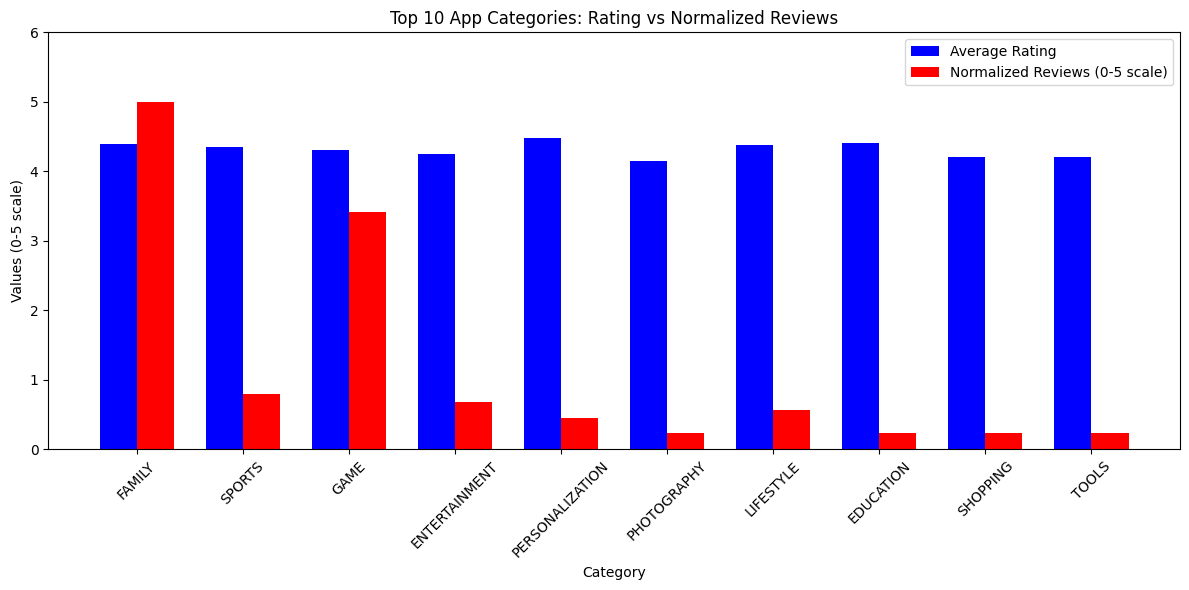

Top 10 Categories Statistics:
Note: Reviews are shown as actual counts, while graph shows normalized values
           Category    Rating  Reviews     Installs
7            FAMILY  4.395455       44  182494820.0
19           SPORTS  4.342857        7  120511000.0
10             GAME  4.313333       30  115691000.0
5     ENTERTAINMENT  4.250000        6   51000000.0
14  PERSONALIZATION  4.475000        4   15060000.0
15      PHOTOGRAPHY  4.150000        2   10500000.0
11        LIFESTYLE  4.380000        5    5071000.0
4         EDUCATION  4.400000        2    2000000.0
17         SHOPPING  4.200000        2    2000000.0
20            TOOLS  4.200000        2    1010000.0


In [21]:
#creating visualization
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_categories))

plt.bar(index, top_categories['Rating'], bar_width, label='Average Rating', color='b')
plt.bar([i + bar_width for i in index], top_categories['Reviews_Normalized'], bar_width, 
        label='Normalized Reviews (0-5 scale)', color='r')

#customize plot
plt.xlabel('Category')
plt.ylabel('Values (0-5 scale)')
plt.title('Top 10 App Categories: Rating vs Normalized Reviews')
plt.xticks([i + bar_width/2 for i in index], top_categories['Category'], rotation=45)
plt.legend()
plt.ylim(0, 6)  

plt.tight_layout()
plt.show()

#displaying results
print("\
Top 10 Categories Statistics:")
print("Note: Reviews are shown as actual counts, while graph shows normalized values")
print(top_categories[['Category', 'Rating', 'Reviews', 'Installs']])

In [6]:
#importing liberaries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Dell\AppData\Local\Temp\ipykernel_19908\212128654.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = filtered_df.groupby([pd.Grouper(key='Last Updated', freq='M'), 'Category'])['Installs'].sum().reset_index()


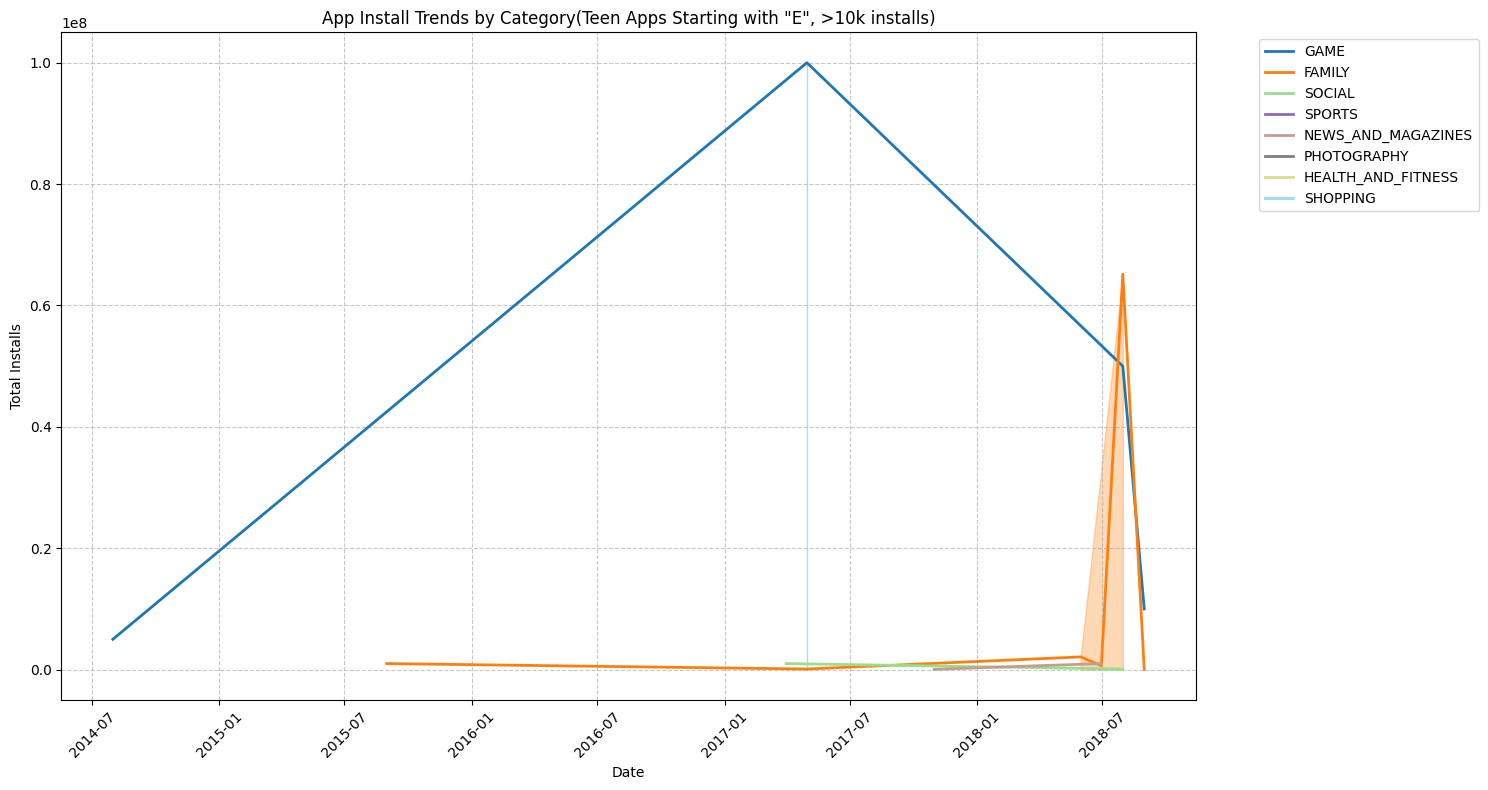

Summary Statistics:
                       Installs                Growth         
                           mean          max     mean      max
Category                                                      
FAMILY              11508333.33   65150000.0  2332.82  9923.08
GAME                41250000.00  100000000.0   590.00  1900.00
HEALTH_AND_FITNESS   1000000.00    1000000.0      NaN      NaN
NEWS_AND_MAGAZINES    525000.00    1000000.0  1900.00  1900.00
PHOTOGRAPHY          1000000.00    1000000.0      NaN      NaN
SHOPPING            21000000.00   21000000.0      NaN      NaN
SOCIAL                550000.00    1000000.0   -90.00   -90.00
SPORTS              50000000.00   50000000.0      NaN      NaN


In [22]:
#loading the data
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

# Clean the dataset
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(float)
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


conditions = (
    (df['Content Rating'] == 'Teen') &
    (df['App'].str.startswith('E')) &
    (df['Installs'] > 10000)
)

filtered_df = df[conditions].copy()

if not filtered_df.empty:
    grouped = filtered_df.groupby([pd.Grouper(key='Last Updated', freq='M'), 'Category'])['Installs'].sum().reset_index()

    grouped['Previous_Month_Installs'] = grouped.groupby('Category')['Installs'].shift(1)
    grouped['Growth'] = (grouped['Installs'] - grouped['Previous_Month_Installs']) / grouped['Previous_Month_Installs'] * 100
    #Plot
    plt.figure(figsize=(15, 8))

    
    categories = grouped['Category'].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

    for idx, category in enumerate(categories):
        category_data = grouped[grouped['Category'] == category]
        
        
        plt.plot(category_data['Last Updated'], 
                 category_data['Installs'], 
                 label=category,
                 color=colors[idx],
                 linewidth=2)
       
        growth_periods = category_data[category_data['Growth'] > 20]
        if not growth_periods.empty:
            plt.fill_between(growth_periods['Last Updated'],
                            growth_periods['Installs'],
                            alpha=0.3,
                            color=colors[idx])

    plt.title('App Install Trends by Category\
(Teen Apps Starting with "E", >10k installs)')
    plt.xlabel('Date')
    plt.ylabel('Total Installs')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #print summary statistics
    print("\
Summary Statistics:")
    summary = grouped.groupby('Category').agg({
        'Installs': ['mean', 'max'],
        'Growth': ['mean', 'max']
    }).round(2)
    print(summary)
else:
    print("No data matches the filtering criteria.")



In [7]:
#import liberaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [23]:
#read the data
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

#cleaning dataset
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(float)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)

In [24]:
#setting time format
current_hour = datetime.now().hour

# Check if current time is between 3 PM & 6 PM 
if 15 <= current_hour <= 18:
    
    filtered_df = df[
        (df['Last Updated'] >= one_year_ago) &
        (df['Installs'] >= 100000) &
        (df['Reviews'] > 1000) &
        (~df['Genres'].str.startswith(('A', 'F', 'E', 'G', 'I', 'K')))
    ].copy()

    correlation_data = filtered_df[['Installs', 'Rating', 'Reviews']]

    correlation_matrix = correlation_data.corr()

    #create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True,  
                cmap='coolwarm',  
                vmin=-1, vmax=1,  
                center=0, 
                square=True,  
                fmt='.2f')  

    plt.title('Correlation Heatmap: Installs, Ratings, and Reviews\
(Filtered Data)')
    plt.tight_layout()
    plt.show()

    #summary statistics
    print("\
Summary Statistics of Filtered Data:")
    print("\
Number of apps in analysis:", len(filtered_df))
    print("\
Mean values:")
    print(correlation_data.mean().round(2))
    print("\
Median values:")
    print(correlation_data.median().round(2))
else:
    print("This analysis can only be run between 3 PM and 6 PM")

This analysis can only be run between 3 PM and 6 PM


In [8]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


In [26]:
#reading the data
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Attachments\\Desktop\\DataAnalysis\\Play Store Data.csv")

#cleaning the data
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(float)

def convert_size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        elif size == 'Varies with device':
            return None
    return None

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [27]:
#setting time format
current_hour = datetime.now().hour

# Check if current time is between 12 PM & 4 PM.
if 12 <= current_hour <= 16:
    
    filtered_df = df[
        (df['Rating'] > 3.5) &
        (df['Category'] == 'GAME') &
        (df['Installs'] > 50000) &
        (df['Size_MB'].notna()) 
    ].copy()

    #create bubble chart
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(
        filtered_df['Size_MB'],
        filtered_df['Rating'],
        s=filtered_df['Installs'].apply(lambda x: np.sqrt(x)/100), 
        alpha=0.6,
        cmap='viridis'
    )

    plt.colorbar(scatter, label='Number of Installs')

    plt.title('Game Apps: Size vs Rating\
(Bubble size represents number of installs)')
    plt.xlabel('App Size (MB)')
    plt.ylabel('Rating')
    plt.grid(True, linestyle='--', alpha=0.7)


    stats_text = (
        f'Total Games: {len(filtered_df)}\
'
        f'Avg Rating: {filtered_df["Rating"].mean():.2f}\
'
        f'Avg Size: {filtered_df["Size_MB"].mean():.2f} MB'
    )
    plt.text(0.95, 0.05, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='bottom',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    #print summary statistics
    print("\
Correlation between Size and Rating:", 
          filtered_df[['Size_MB', 'Rating']].corr().iloc[0,1].round(3))
    
    print("\
Top 5 largest games with high ratings:")
    print(filtered_df.nlargest(5, 'Size_MB')[['App', 'Size_MB', 'Rating', 'Installs']])
    
else:
    print("This analysis can only be run between 12 PM and 4 PM")

This analysis can only be run between 12 PM and 4 PM
